<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_3293/NGC_3293_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 4.4MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 2.6MB 46.8MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=43c0146013df81d58630432d2ef078f8097dc489e9917325502c07aea864736a
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC3293 center

coordinate = coord.SkyCoord.from_name('NGC3293')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (158.955, -58.23)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 5351447238429893888,5351447238429893888,128092194,2015.5,158.954102,0.805624,-58.231444,0.904548,1.580851,1.117148,1.415077,-4.596749,2.388422,1.126415,1.994130,-0.155291,-0.269302,-0.217404,0.265403,0.153783,0.319802,-0.401318,-0.286013,0.123788,0.152974,119,0,119,0,3.634906,177.269119,2.194535,2.104447,31,False,0.040210,1.278784,0.193566,-0.159611,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.853035,0.070163,198.531901,-58.785645,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001517
1,1635721458409799680,Gaia DR2 5351448715898764800,5351448715898764800,528532118,2015.5,158.957741,1.068505,-58.228677,1.123033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.129842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88,0,87,1,5.834652,180.582489,3.725129,6.515405,3,False,0.031303,NaN,NaN,-0.116337,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.853325,0.073516,198.530656,-58.782341,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001956
2,1635721458409799680,Gaia DR2 5351447238429962368,5351447238429962368,1453165503,2015.5,158.954995,1.246294,-58.231988,0.882215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.592404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,0,106,0,3.091953,150.754089,1.830045,1.954333,3,False,0.062480,NaN,NaN,-0.186347,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.853713,0.069924,198.533287,-58.785688,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001984
3,1635721458409799680,Gaia DR2 5351448715895929728,5351448715895929728,587510854,2015.5,158.955345,0.235379,-58.227730,0.284457,0.506660,0.301901,1.678234,-8.804943,0.570411,8.758619,0.488917,0.243336,-0.097713,0.252344,0.461485,0.391762,0.638010,0.339226,0.157617,0.379714,0.258301,148,0,146,2,6.667548,284.154663,1.082394,6.628915,31,False,0.363259,1.432369,0.048411,-0.043816,...,1515.454641,36.837284,41.139153,16.810562,2.966690,0,0.693451,-0.711847,1.405298,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.851760,0.073712,198.527650,-58.782585,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.002281
4,1635721458409799680,Gaia DR2 5351447238444375936,5351447238444375936,627262602,2015.5,158.952011,0.029027,-58.232539,0.027980,0.343626,0.030318,11.334161,-7.775487,0.058220,3.242510,0.054211,-0.027468,-0.079741,-0.135325,0.513097,0.113623,0.565735,-0.059250,0.134492,0.204688,0.107117,192,0,190,2,-0.442584,175.971069,0.000000,0.000000

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [9]:
all_stars_filtered.shape

(50404, 99)

##### Visualizing GAIA data

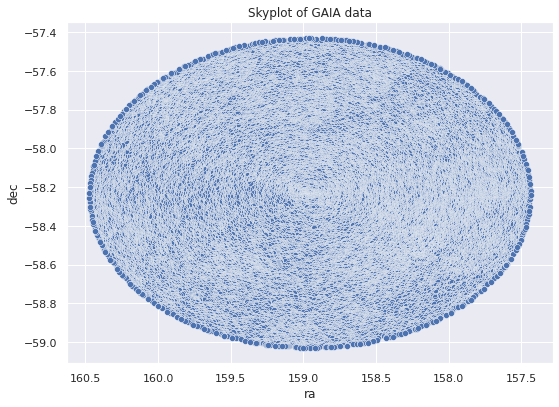

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only NGC 3293 data from Cantat GAIA DR2 paper

cantat_3293 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_3293")
cantat_3293 = cantat_3293[0].to_pandas()
cantat_3293

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,159.138841,-58.342722,5350695138128318464,0.3842,-7.552,3.372,NaN,14.623600,0.5547,0.9,NGC_3293,159.138903,-58.342736
1,159.028629,-58.310262,5350696134560589440,0.3524,-7.774,3.379,NaN,13.557100,0.5473,1.0,NGC_3293,159.028693,-58.310277
2,158.996248,-58.286858,5350696203280067456,0.3767,-7.613,3.342,NaN,17.210699,1.3604,0.9,NGC_3293,158.996310,-58.286873
3,159.057697,-58.318124,5350695928402160000,0.4028,-7.770,3.212,NaN,13.081900,0.5480,0.9,NGC_3293,159.057761,-58.318138
4,159.064112,-58.309625,5350696031481376384,0.3650,-7.933,2.758,NaN,17.822201,1.4310,0.2,NGC_3293,159.064177,-58.309637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,159.027317,-58.097191,5351543411342576128,0.4411,-8.072,3.098,NaN,17.899300,1.1319,0.1,NGC_3293,159.027382,-58.097205
653,159.091837,-58.115276,5351543170824427520,0.4172,-7.331,2.746,NaN,17.134701,1.2670,0.3,NGC_3293,159.091896,-58.115288
654,159.110404,-58.048860,5351545198049116416,0.4093,-7.743,3.719,NaN,14.627900,0.5725,0.1,NGC_3293,159.110467,-58.048876
655,158.957864,-58.034643,5351544712700452224,0.3125,-7.104,3.262,NaN,15.681900,1.0012,0.1,NGC_3293,158.957922,-58.034657


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_3293 = cantat_3293.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_3293 = cantat_3293.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_3293 = all_stars_filtered.join(cantat_3293.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_3293 = cantat_3293.dropna(subset=['PMemb'])
cantat_3293

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
4,1635721458409799680,Gaia DR2 5351447238444375936,5351447238444375936,627262602,2015.5,158.952011,0.029027,-58.232539,0.027980,0.343626,0.030318,11.334161,-7.775487,0.058220,3.242510,0.054211,-0.027468,-0.079741,-0.135325,0.513097,0.113623,0.565735,-0.059250,0.134492,0.204688,0.107117,192,0,190,2,-0.442584,175.971069,0.000000,0.000000,31,False,30.069584,1.662618,0.006246,0.016850,...,14.327250,1.236436,0,0.561605,0.171326,0.390280,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.852623,0.068666,198.531933,-58.787197,100001,6851.000000,6484.075195,7365.250000,1.2320,0.9549,1.4393,0.6385,0.4949,0.7351,200111,2.010348,1.739419,2.244311,8.021451,6.308611,9.734291,https://gea.esac.esa.int/data-server/datalink/...,,0.002987,133.553630,59.813159,1.0
10,1635721458409799680,Gaia DR2 5351447238444383744,5351447238444383744,230283850,2015.5,158.946719,0.036591,-58.227077,0.036062,0.278193,0.042357,6.567760,-7.834517,0.067352,3.125448,0.069531,0.010594,-0.214257,-0.261037,0.276264,0.220526,0.323439,-0.008844,0.276007,0.133519,0.007996,170,170,165,5,11.251204,456.114624,0.048191,0.697239,31,False,180.741867,1.770945,0.010376,-0.101524,...,11.515003,1.187820,1,0.037317,-0.012627,0.049944,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.847493,0.072023,198.520631,-58.785382,102002,9480.333008,6217.333496,9613.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005258,116.321703,44.950617,0.8
14,1635721458409799680,Gaia DR2 5351448715913147904,5351448715913147904,1172023644,2015.5,158.955427,0.037934,-58.224267,0.041066,0.361111,0.047680,7.573609,-7.745214,0.070516,3.234497,0.078859,0.097815,-0.356171,-0.212339,0.097971,0.004786,0.248625,-0.321791,0.067943,0.273823,0.039968,213,213,205,8,14.106810,634.158997,0.113007,4.174742,31,False,54.696457,1.774363,0.009639,-0.058666,...,6.434452,1.155608,0,0.038411,0.017635,0.020776,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.850078,0.076739,198.522922,-58.780137,100001,9002.000000,7904.500000,9478.000000,0.0763,0.0189,0.3038,0.0480,0.0113,0.1380,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005742,109.836772,41.016178,1.0
18,1635721458409799680,Gaia DR2 5351448505437777280,5351448505437777280,3140375,2015.5,158.965521,0.034032,-58.227546,0.035259,0.340286,0.043593,7.806006,-7.750376,0.070863,3.108346,0.073514,0.222115,-0.387199,0.062676,0.209676,0.051695,0.373335,0.037221,-0.113833,0.263384,0.135983,186,151,184,2,10.521373,459.741333,0.000000,0.000000,31,False,202.741119,1.751290,0.007475,-0.151637,...,12.557397,1.192920,1,0.173354,0.035826,0.137528,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.856319,0.076531,198.534608,-58.778618,100002,9283.500000,8456.250000,9696.000000,0.7537,0.6924,0.87

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_3293.to_csv('NGC_3293_cantat.csv')
# all_stars.to_csv('NGC_3293_Gaia_30m.csv')

In [19]:
cantat_3293.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,6.170000e+02,6.170000e+02,6.170000e+02,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,6.060000e+02,606.000000,606.000000,606.000000,606.000000,617.000000,606.000000,606.000000,606.000000,4.000000,4.000000,617.000000,4.000000,4.000000,4.0,617.000000,617.000000,617.000000,617.000000,542.000000,542.000000,542.000000,542.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,617.000000,617.000000,617.000000,617.000000
mean,1.635721e+18,5.351256e+18,8.363382e+08,2015.5,158.941904,0.041943,-58.223179,0.040669,0.377758,0.048224,9.646549,-7.585979,0.081004,3.312147,0.078552,-0.034065,-0.277253,-0.289735,0.269403,0.176014,0.343567,-0.078138,0.187742,0.107994,0.056990,202.012966,30.241491,200.594814,1.418152,1.933214,253.842484,0.045447,0.890093,31.0,57.463230,1.612082,0.009867,-0.019965,23.179903,14.363047,...,3.179429e+05,1402.647664,415.899536,14.194469,1.287667,0.126418,0.800674,0.281763,0.518911,-4.272901,1.939050,0.047002,5125.000000,3.750000,0.0,285.843385,0.074071,198.511906,-58.784460,100244.710332,6671.687500,6329.378418,7030.716309,0.887406,0.594932,1.159183,0.445821,0.296745,0.580796,200111.0,4.597406,4.195796,5.021256,204.749573,168.066162,241.432739,0.088519,116.088744,52.011062,0.623826
std,0.000000e+00,3.282539e+14,4.900179e+08,0.0,0.143802,0.022872,0.071464,0.021987,0.055162,0.025881,4.179525,0.297270,0.043753,0.258574,0.041686,0.130535,0.128759,0.134003,0.110426,0.135790,0.107464,0.168650,0.121315,0.124428,0.137145,29.852339,69.235916,29.937237,2.198035,4.982976,161.599686,0.100777,3.780193,0.0,91.347198,0.104319,0.005260,0.067146,3.384224,1.805780,...,3.238660e+06,18635.188164,295.304871,1.807223,0.122409,0.369581,0.480531,0.217601,0.284884,16.832975,2.896037,0.634041,478.713562,0.866025,0.0,0.077342,0.069729,0.147941,0.070473,654.799456,1716.841797,1620.376953,1746.008789,0.403292,0.382866,0.449504,0.203589,0.190589,0.229465,0.0,32.267616,30.286135,35.228199,3162.824707,2605.815430,3719.859619,0.055579,47.873137,21.882236,0.332883
min,1.635721e+18,5.350689e+18,4.845840e+05,2015.5,158.586102,0.016119,-58.422563,0.014866,0.249344,0.017534,3.011133,-8.527944,0.030638,2.396999,0.029315,-0.656215,-0.756654,-0.869462,-0.153854,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-0.569122,61.000000,0.00000

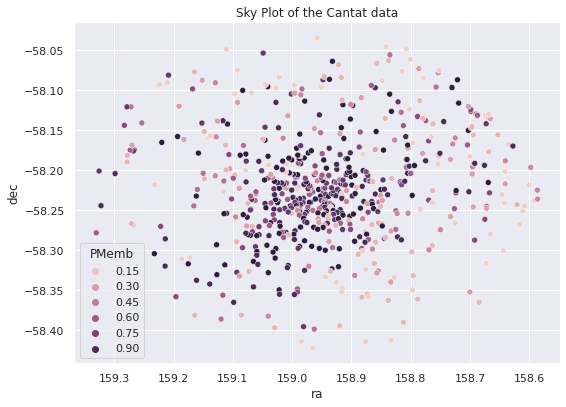

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_3293['ra'], y = cantat_3293['dec'], 
                          hue = cantat_3293['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_3293.copy()

In [22]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_3293_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_3293_center)
cantat_radius

0.2031873079382218

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_3293_center,member
4,1635721458409799680,Gaia DR2 5351447238444375936,5351447238444375936,627262602,2015.5,158.952011,0.029027,-58.232539,0.027980,0.343626,0.030318,11.334161,-7.775487,0.058220,3.242510,0.054211,-0.027468,-0.079741,-0.135325,0.513097,0.113623,0.565735,-0.059250,0.134492,0.204688,0.107117,192,0,190,2,-0.442584,175.971069,0.000000,0.000000,31,False,30.069584,1.662618,0.006246,0.016850,...,0,0.561605,0.171326,0.390280,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.852623,0.068666,198.531933,-58.787197,100001,6851.000000,6484.075195,7365.25,1.2320,0.9549,1.4393,0.6385,0.4949,0.7351,200111,2.010348,1.739419,2.244311,8.021451,6.308611,9.734291,https://gea.esac.esa.int/data-server/datalink/...,,0.002987,133.553630,59.813159,1.0,0.002987,1
10,1635721458409799680,Gaia DR2 5351447238444383744,5351447238444383744,230283850,2015.5,158.946719,0.036591,-58.227077,0.036062,0.278193,0.042357,6.567760,-7.834517,0.067352,3.125448,0.069531,0.010594,-0.214257,-0.261037,0.276264,0.220526,0.323439,-0.008844,0.276007,0.133519,0.007996,170,170,165,5,11.251204,456.114624,0.048191,0.697239,31,False,180.741867,1.770945,0.010376,-0.101524,...,1,0.037317,-0.012627,0.049944,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.847493,0.072023,198.520631,-58.785382,102002,9480.333008,6217.333496,9613.00,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005258,116.321703,44.950617,0.8,0.005250,1
14,1635721458409799680,Gaia DR2 5351448715913147904,5351448715913147904,1172023644,2015.5,158.955427,0.037934,-58.224267,0.041066,0.361111,0.047680,7.573609,-7.745214,0.070516,3.234497,0.078859,0.097815,-0.356171,-0.212339,0.097971,0.004786,0.248625,-0.321791,0.067943,0.273823,0.039968,213,213,205,8,14.106810,634.158997,0.113007,4.174742,31,False,54.696457,1.774363,0.009639,-0.058666,...,0,0.038411,0.017635,0.020776,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.850078,0.076739,198.522922,-58.780137,100001,9002.000000,7904.500000,9478.00,0.0763,0.0189,0.3038,0.0480,0.0113,0.1380,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005742,109.836772,41.016178,1.0,0.005737,1
18,1635721458409799680,Gaia DR2 5351448505437777280,5351448505437777280,3140375,2015.5,158.965521,0.034032,-58.227546,0.035259,0.340286,0.043593,7.806006,-7.750376,0.070863,3.108346,0.073514,0.222115,-0.387199,0.062676,0.209676,0.051695,0.373335,0.037221,-0.113833,0.263384,0.135983,186,151,184,2,10.521373,459.741333,0.000000,0.000000,31,False,202.741119,1.751290,0.007475,-0.151637,...,1,0.173354,0.035826,0.137528,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.856319,0.076531,198.534608,-58.778618,100002,9283.500000,8456.250000,9696.00,0.7537,0.6924,0.8717,0.3790,0.3416,0.4556,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.in

In [25]:
### adding their distance from the center of the clusters

## NGC 3293
center = coord.SkyCoord.from_name('NGC3293')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_3293_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_3293_center'] >= 0.7].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_3293_center,member
284066,1635721458409799680,Gaia DR2 5351587769766649600,5351587769766649600,63444420,2015.5,159.439268,0.079112,-57.485610,0.081089,0.850168,0.104875,8.106501,0.654501,0.163215,5.726452,0.146898,-0.028504,-0.215357,-0.090206,0.087852,0.300562,0.197651,0.148989,0.199228,0.218170,0.015787,262,0,262,0,0.617945,270.575378,0.098189,0.131932,31,False,1.321647,1.506203,0.020221,0.044957,...,1.341197,0,1.471146,0.624846,0.846300,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.709594,0.846248,197.866886,-58.077344,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.787712,4.010041,38.982631,0.788588,0
265580,1635721458409799680,Gaia DR2 5351522550672327296,5351522550672327296,57679836,2015.5,157.824258,0.088098,-57.759658,0.086201,0.546269,0.104937,5.205696,-6.112680,0.182500,3.657212,0.187401,-0.005953,-0.302346,-0.158822,0.075516,-0.004712,0.072432,-0.127563,-0.045276,-0.059453,0.212436,211,0,211,0,0.377554,213.076355,0.000000,0.000000,31,False,1.363984,1.484483,0.020425,0.009029,...,1.293732,0,1.324213,0.564362,0.759851,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.098118,0.176091,197.071024,-58.883504,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.761810,33.494074,19.515434,0.764915,0
279209,1635721458409799680,Gaia DR2 5351525647370630400,5351525647370630400,256765554,2015.5,157.607657,0.033246,-57.910232,0.026644,0.387386,0.038151,10.153966,-5.410764,0.059885,3.442634,0.054721,0.057194,-0.484100,-0.326269,0.169379,-0.059953,0.127979,0.023839,0.301139,-0.138526,0.158771,214,0,214,0,-1.831851,173.151566,0.000000,0.000000,31,False,15.507074,1.571291,0.008447,-0.046573,...,1.228003,0,1.006993,0.421309,0.585684,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,285.076229,-0.012296,197.123073,-59.071252,100001,5298.0,5032.750000,5400.5,1.4210,0.9519,1.8301,0.7090,0.4244,0.9004,200111,2.238015,2.153867,2.48014,3.555237,2.749395,4.361080,https://gea.esac.esa.int/data-server/datalink/...,,0.781033,90.352336,62.911988,0.783953,0
283106,1635721458409799680,Gaia DR2 5350753133049010816,5350753133049010816,1296530495,2015.5,160.447731,0.137311,-58.209507,0.134073,0.708183,0.172927,4.095267,-5.270043,0.271220,3.322416,0.244401,0.000735,-0.047251,-0.170157,0.169931,0.209110,0.234533,0.068547,0.353925,0.029625,0.042501,274,0,274,0,1.401446,302.112366,0.000000,0.000000,31,False,0.426708,1.431891,0.039072,0.177793,...,1.550209,0,2.174965,0.999216,1.175749,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,286.529483,0.472236,199.556006,-58.208680,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.786410,19.430883,13.594122,0.786660,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


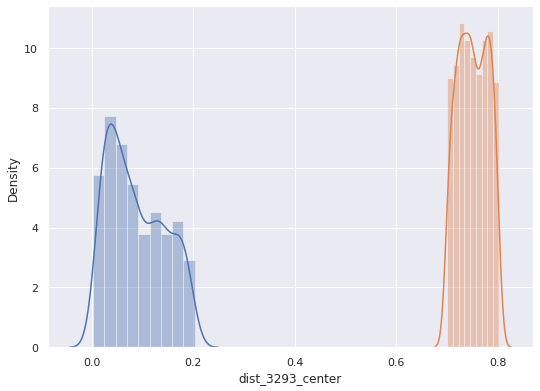

In [28]:
sns.distplot(member['dist_3293_center'])
sns.distplot(non_member['dist_3293_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_3293_center,member
count,1.234000e+03,1.234000e+03,1.234000e+03,1234.0,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.0,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,...,1218.000000,1218.000000,1218.000000,1234.000000,1218.000000,1218.000000,1218.000000,18.000000,18.000000,1234.000000,18.000000,18.000000,18.0,1234.000000,1234.000000,1234.000000,1234.000000,929.000000,929.000000,929.000000,929.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,562.0,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,1234.000000,1234.000000,1234.000000,617.000000,1234.000000,1234.000000
mean,1.635721e+18,5.345595e+18,8.392007e+08,2015.5,158.941515,0.050447,-58.200070,0.048825,0.493564,0.059235,11.076872,-7.505462,0.100209,3.211276,0.096401,-0.028002,-0.259092,-0.253351,0.205892,0.176944,0.266953,-0.062655,0.193434,0.055896,0.093070,218.816045,19.114263,217.500810,1.315235,1.588539,271.756805,0.071157,1.541048,31.0,37.910995,1.558622,0.012656,0.010846,25.064019,15.274716,...,372.003021,14.866279,1.311895,0.094814,1.075002,0.427224,0.647778,4.655402,1.991360,0.091572,5083.333496,3.305556,0.0,285.832521,0.092257,198.482171,-58.767871,100181.967707,6029.646484,5741.135254,6360.716309,0.880640,0.627953,1.140559,0.439506,0.310633,0.569420,200111.0,3.623498,3.253512,3.959988,108.377449,88.985245,127.769646,0.419951,104.201707,48.565106,0.623826,0.420046,0.500000
std,0.000000e+00,2.248707e+16,4.880151e+08,0.0,0.717076,0.030363,0.380512,0.029345,0.353569,0.036021,11.536470,3.246487,0.060982,2.696039,0.058123,0.118342,0.117130,0.129572,0.120358,0.121595,0.128762,0.161629,0.113141,0.123760,0.132760,30.334353,58.131217,30.438489,1.885268,5.589797,264.692932,0.149348,9.167983,0.0,75.538216,0.110995,0.007984,0.072441,3.423589,1.710108,...,309.646606,1.750086,0.130750,0.324589,0.550379,0.286202,0.288735,21.749105,3.362238,0.808838,669.723389,0.489264,0.0,0.386645,0.371581,0.749831,0.369442,573.983621,1627.905762,1535.999023,1666.498047,0.566587,0.540319,0.616942,0.283630,0.267332,0.308666,0.0,23.259829,21.801691,25.404364,2268.357666,1868.859497,2667.876953,0.334510,69.082252,36.922962,0.332883,0.334599,0.500203
min,1.635721e+18,5.254573e+18,3.688420e+05,2015.5,157.439508,0.013808,-59.029445,0.013737,0.135242,0.016241,3.011133,-44.600724,0.027551,-29.544932,0.027501,-0.656215,-0.756654,-0.869462,-0.218081,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,1234.000000,1234.000000,1234.000000
mean,0.493565,-7.505463,3.211277
std,0.353569,3.246486,2.696039
min,0.135242,-44.600723,-29.544931
25%,0.352226,-7.841652,2.851271
50%,0.402903,-7.567615,3.292808
75%,0.496260,-6.750999,3.539481
max,6.366280,12.820158,42.180836


In [33]:
targets.value_counts()

1    617
0    617
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


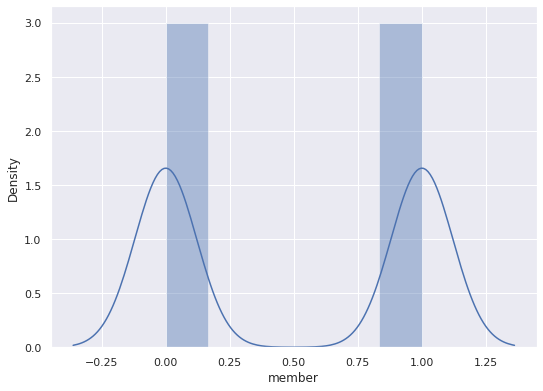

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

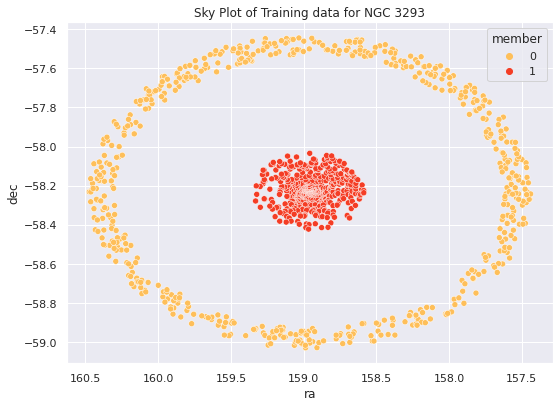

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for NGC 3293')
plt.show()

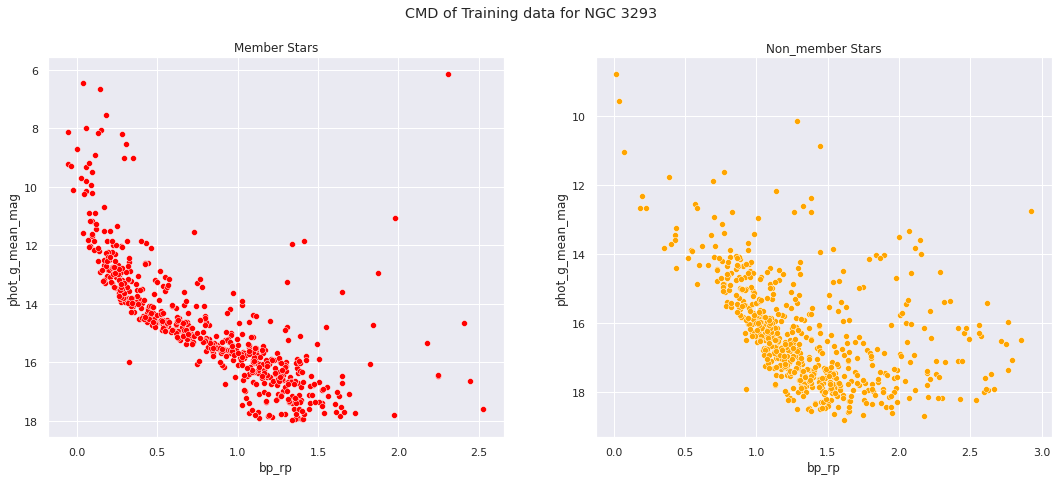

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for NGC 3293 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


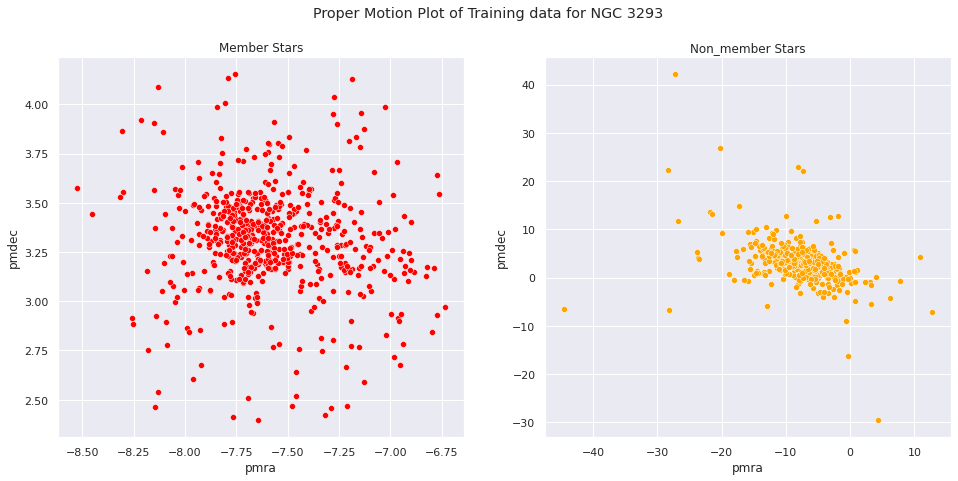

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for NGC 3293 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


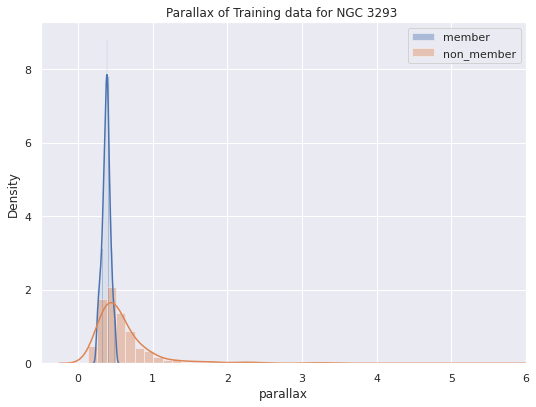

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for NGC 3293 ')
plt.legend()
plt.show()

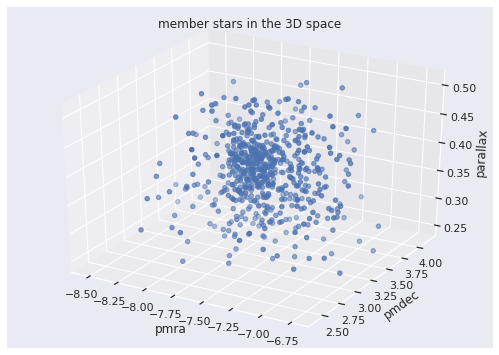

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


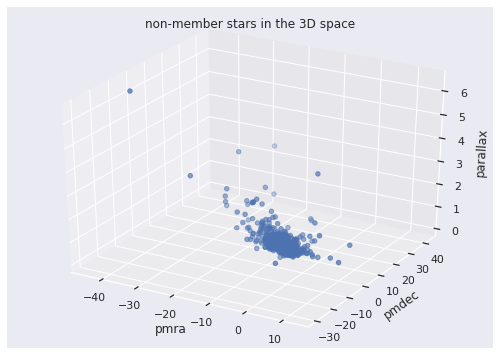

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmra        0.417714
pmdec       0.295607
parallax    0.286679
dtype: float64

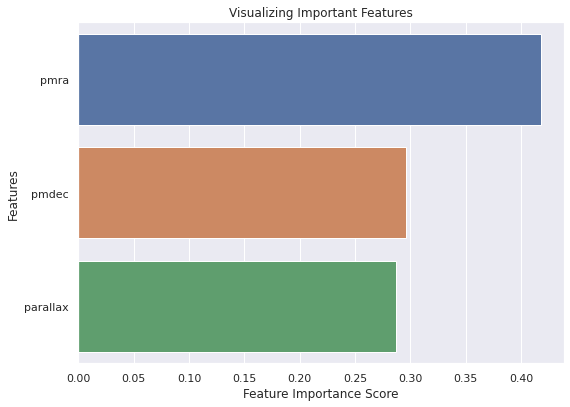

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [48]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [49]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.015625,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 900}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.944
Accuracy on test data: 0.951


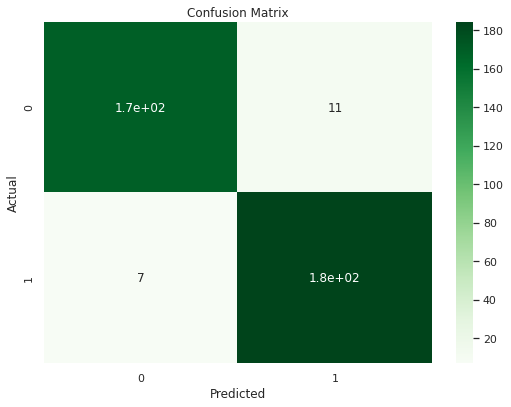

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       180
           1       0.94      0.96      0.95       191

    accuracy                           0.95       371
   macro avg       0.95      0.95      0.95       371
weighted avg       0.95      0.95      0.95       371



In [51]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.946
Precision on testing data: 0.944
Accuracy on test data: 0.954


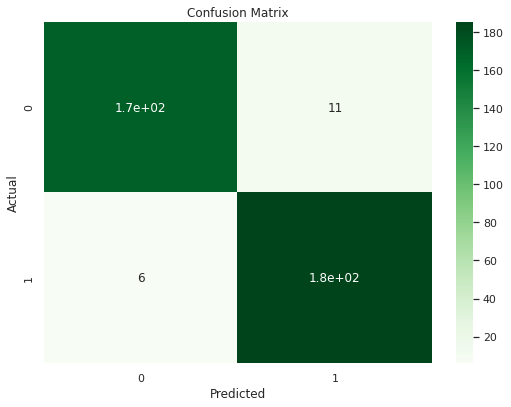

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       180
           1       0.94      0.97      0.96       191

    accuracy                           0.95       371
   macro avg       0.95      0.95      0.95       371
weighted avg       0.95      0.95      0.95       371



In [52]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [53]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_3293_center
count,5.040400e+04,5.040400e+04,5.040400e+04,50404.0,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.0,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,50404.000000,...,4.980000e+04,49800.000000,49800.000000,49800.000000,49799.000000,50404.000000,49799.000000,49808.000000,49800.000000,1231.000000,1231.000000,50404.000000,1231.000000,1231.000000,1231.000000,50404.000000,50404.000000,50404.000000,50404.000000,31920.000000,31920.000000,31920.000000,31920.000000,17759.000000,17759.000000,17759.000000,17759.000000,17759.000000,17759.000000,21685.0,21685.000000,21685.000000,21685.000000,21685.000000,21685.000000,21685.000000,50404.000000,50404.000000,50404.000000,50404.000000
mean,1.635721e+18,5.347233e+18,8.472083e+08,2015.5,158.883881,0.059862,-58.216320,0.057227,0.593028,0.070675,11.924011,-7.411128,0.119217,3.092847,0.112665,-0.034244,-0.239483,-0.231100,0.161807,0.194820,0.218523,-0.044257,0.219652,0.029651,0.100744,233.530553,8.816344,232.256111,1.274443,1.305189,284.896240,0.098070,1.995475,31.0,20.779434,1.515238,0.015580,0.041753,26.704448,15.955638,...,3.788015e+04,131.967570,311.785736,15.509663,1.354270,0.058388,1.286662,0.517140,0.769441,9.269258,2.598937,0.137350,5210.804199,3.378960,-0.085500,285.814676,0.062975,198.464198,-58.800901,100118.680984,5184.242676,4969.041504,5486.135254,0.853356,0.626344,1.113574,0.423965,0.309603,0.555153,200111.0,2.598418,2.330611,2.809655,19.146591,15.761447,22.531681,0.528873,92.481945,45.899218,0.528862
std,0.000000e+00,1.901477e+16,4.880750e+08,0.0,0.767221,0.034418,0.388700,0.032839,0.494534,0.040664,14.566044,5.382248,0.068120,3.759578,0.064154,0.115647,0.105517,0.128839,0.105997,0.106003,0.115463,0.157314,0.100872,0.102399,0.131705,21.614776,43.253203,21.597877,1.756052,5.689113,368.477631,0.183941,12.432440,0.0,56.169525,0.087455,0.009112,0.061259,2.452008,1.077248,...,1.170831e+06,5459.352363,311.095154,1.434480,0.169997,0.270176,0.458579,0.277354,0.231119,26.342032,3.372297,0.953205,668.424683,0.519902,0.347538,0.395579,0.397273,0.754196,0.402053,470.570705,958.210632,930.558289,996.337341,0.668776,0.641060,0.712484,0.335822,0.319408,0.360426,0.0,6.606672,5.946941,7.163124,584.492493,470.101624,699.519409,0.190048,94.218977,54.975253,0.190066
min,1.635721e+18,5.254570e+18,1.522900e+04,2015.5,157.435614,0.012693,-59.029445,0.012876,0.090024,0.0

In [54]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_3293_center'] <= cantat_radius*2]

In [55]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [56]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [57]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [58]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    11366
1     1089
Name: member, dtype: int64

In [59]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

1089

In [60]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

1089

In [61]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_3293_center,member,PMemb
count,1.089000e+03,1.089000e+03,1.089000e+03,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.0,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,...,1084.000000,1084.000000,1084.000000,1089.000000,1084.000000,1084.000000,1084.000000,14.000000,14.000000,1089.000000,14.000000,14.000000,14.0,1089.000000,1089.000000,1089.000000,1089.000000,830.000000,830.000000,830.000000,830.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,446.0,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.0,1089.000000
mean,1.635721e+18,5.351237e+18,8.361704e+08,2015.5,158.830797,0.048812,-58.224050,0.047485,0.361755,0.057624,8.212680,-7.376427,0.097050,3.274538,0.092486,-0.034543,-0.233496,-0.220165,0.190126,0.221174,0.251372,-0.075425,0.217197,0.063041,0.092398,233.865932,13.986226,232.574839,1.291093,1.221374,268.771240,0.063705,1.081691,31.0,27.960178,1.536918,0.012463,0.041990,26.715335,15.947658,...,352.236450,15.107753,1.339625,0.050505,1.187129,0.468684,0.718444,14.162984,1.611848,0.060606,4857.143066,3.357143,0.0,285.793390,0.043750,198.435139,-58.826796,100150.479518,5456.196289,5195.270996,5793.600586,1.209643,0.931350,1.504624,0.601057,0.460370,0.748927,200111.0,3.667945,3.276904,3.980690,55.770283,47.877361,63.663227,0.297738,100.441774,46.467214,0.297747,1.0,0.797868
std,0.000000e+00,3.408870e+14,4.842967e+08,0.0,0.408211,0.026220,0.211050,0.025280,0.079513,0.030834,4.800362,0.398968,0.052478,0.355311,0.049202,0.132246,0.106207,0.162616,0.099932,0.115402,0.110474,0.175784,0.091201,0.096037,0.134826,20.324130,53.990968,20.375883,1.900252,4.415537,161.066727,0.125794,4.641695,0.0,62.988327,0.098298,0.006874,0.062371,2.307627,1.057195,...,301.758789,1.501062,0.146381,0.231329,0.502540,0.279313,0.258805,15.247453,2.051211,0.579997,497.245148,0.633324,0.0,0.210883,0.215127,0.404316,0.216660,526.204315,1294.678345,1237.230591,1329.514648,0.648929,0.664779,0.648459,0.324964,0.329607,0.328990,0.0,5.902847,5.408901,6.198219,697.566284,610.088806,785.067566,0.079539,52.530380,24.738985,0.079527,0.0,0.128803
min,1.635721e+18,5.350662e+18,3.483190e+05,2015.5,158.195560,0.014418,-58.628597,0.014595,0.128301,0.017599,3.007645,-8.338308,0.029306,2.408789,0.027629,-0.853866,-0.736077,-0.643190,-0.263703,-0.177892,-0.242035,-0.649466,-0.348651,-0.268684,-0.560040,90.000000,0.00000

In [62]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_3293_center,member
count,6.170000e+02,6.170000e+02,6.170000e+02,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,606.000000,606.000000,606.000000,617.000000,606.000000,606.000000,606.000000,4.000000,4.000000,617.000000,4.000000,4.000000,4.0,617.000000,617.000000,617.000000,617.000000,542.000000,542.000000,542.000000,542.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0
mean,1.635721e+18,5.351256e+18,8.363382e+08,2015.5,158.941904,0.041943,-58.223179,0.040669,0.377758,0.048224,9.646549,-7.585979,0.081004,3.312147,0.078552,-0.034065,-0.277253,-0.289735,0.269403,0.176014,0.343567,-0.078138,0.187742,0.107994,0.056990,202.012966,30.241491,200.594814,1.418152,1.933214,253.842484,0.045447,0.890093,31.0,57.463230,1.612082,0.009867,-0.019965,23.179903,14.363047,...,415.899536,14.194469,1.287667,0.126418,0.800674,0.281763,0.518911,-4.272901,1.939050,0.047002,5125.000000,3.750000,0.0,285.843385,0.074071,198.511906,-58.784460,100244.710332,6671.687500,6329.378418,7030.716309,0.887406,0.594932,1.159183,0.445821,0.296745,0.580796,200111.0,4.597406,4.195796,5.021256,204.749573,168.066162,241.432739,0.088519,116.088744,52.011062,0.623826,0.088529,1.0
std,0.000000e+00,3.282539e+14,4.900179e+08,0.0,0.143802,0.022872,0.071464,0.021987,0.055162,0.025881,4.179525,0.297270,0.043753,0.258574,0.041686,0.130535,0.128759,0.134003,0.110426,0.135790,0.107464,0.168650,0.121315,0.124428,0.137145,29.852339,69.235916,29.937237,2.198035,4.982976,161.599686,0.100777,3.780193,0.0,91.347198,0.104319,0.005260,0.067146,3.384224,1.805780,...,295.304871,1.807223,0.122409,0.369581,0.480531,0.217601,0.284884,16.832975,2.896037,0.634041,478.713562,0.866025,0.0,0.077342,0.069729,0.147941,0.070473,654.799456,1716.841797,1620.376953,1746.008789,0.403292,0.382866,0.449504,0.203589,0.190589,0.229465,0.0,32.267616,30.286135,35.228199,3162.824707,2605.815430,3719.859619,0.055579,47.873137,21.882236,0.332883,0.055593,0.0
min,1.635721e+18,5.350689e+18,4.845840e+05,2015.5,158.586102,0.016119,-58.422563,0.014866,0.249344,0.017534,3.011133,-8.527944,0.030638,2.396999,0.029315,-0.656215,-0.756654,-0.869462,-0.153854,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-0.569122,61.000000,0.000000,61.000000,0.000000,-5.831085,35.025322,0.000000,

#### Visualization

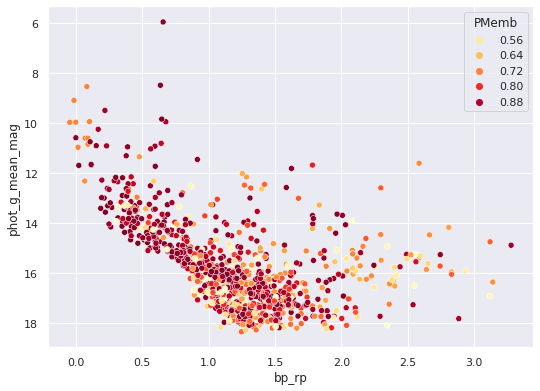

In [63]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

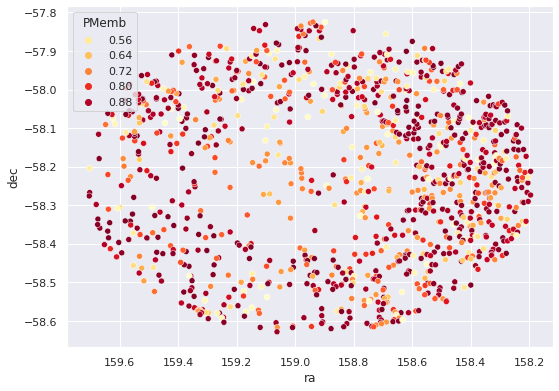

In [64]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

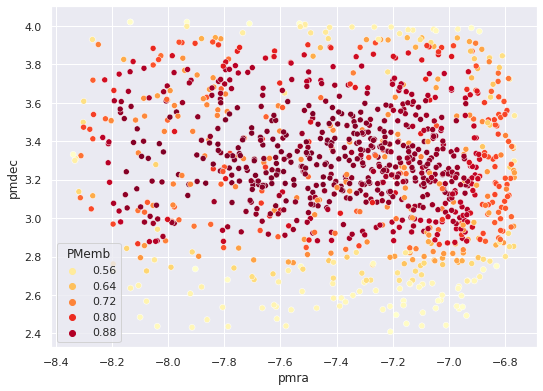

In [65]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


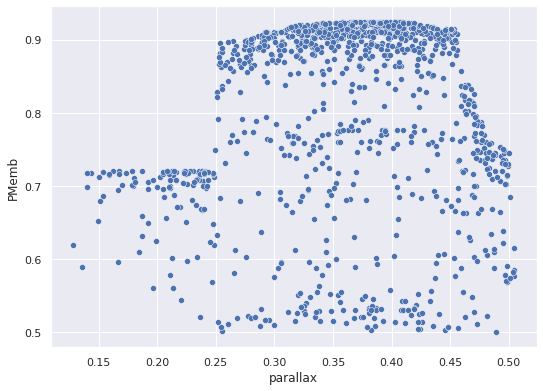

In [66]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [67]:
# saving the files as csv
# all_stars.to_csv('gaia_3293_membership_prob.csv')

potentialMember.to_csv('NGC_3293_membership_prob.csv')


### Comparing the old and new predicted members

In [68]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [69]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_3293_center,member,PMemb
count,1.706000e+03,1.706000e+03,1.706000e+03,1706.0,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.0,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,...,1690.000000,1690.000000,1690.000000,1706.000000,1690.000000,1690.000000,1690.000000,18.000000,18.000000,1706.000000,18.000000,18.000000,18.0,1706.000000,1706.000000,1706.000000,1706.000000,1372.000000,1372.000000,1372.000000,1372.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,735.0,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.0,1706.000000
mean,1.635721e+18,5.351244e+18,8.362311e+08,2015.5,158.870980,0.046327,-58.223735,0.045020,0.367543,0.054225,8.731255,-7.452215,0.091247,3.288140,0.087447,-0.034370,-0.249321,-0.245326,0.218797,0.204842,0.284715,-0.076406,0.206544,0.079299,0.079592,222.345838,19.865182,221.008792,1.337046,1.478821,263.371979,0.057101,1.012397,31.0,38.630413,1.564102,0.011524,0.019583,25.436694,15.374560,...,375.064636,14.780259,1.320996,0.077960,1.048555,0.401658,0.646895,10.066121,1.684559,0.055686,4916.666504,3.444444,0.0,285.811471,0.054716,198.462903,-58.811485,100187.704810,5936.367676,5643.293457,6282.313477,1.071989,0.787637,1.357057,0.534742,0.390472,0.677104,200111.0,4.033405,3.638209,4.389841,114.348503,95.135376,133.561707,0.222071,106.100731,48.472228,0.222080,1.0,0.734923
std,0.000000e+00,3.363945e+14,4.862300e+08,0.0,0.341551,0.025271,0.173979,0.024356,0.072062,0.029480,4.635803,0.379004,0.050084,0.324104,0.047090,0.131591,0.116748,0.156461,0.110589,0.125025,0.117999,0.173193,0.104045,0.109297,0.136693,28.634454,60.440616,28.722526,2.013328,4.639977,161.371887,0.117661,4.349695,0.0,75.812645,0.106783,0.006458,0.070696,3.228508,1.572054,...,300.926605,1.675296,0.140456,0.291252,0.528221,0.273909,0.284924,17.028972,2.171895,0.599956,492.592194,0.683608,0.0,0.176400,0.177485,0.337022,0.179340,582.014968,1590.593994,1506.410156,1624.130493,0.579331,0.585647,0.596544,0.289777,0.290141,0.302115,0.0,20.733236,19.438124,22.594076,2055.571289,1701.003418,2410.514648,0.123549,51.433808,23.888062,0.123546,0.0,0.240039
min,1.635721e+18,5.350662e+18,3.483190e+05,2015.5,158.195560,0.014418,-58.628597,0.014595,0.128301,0.017534,3.007645,-8.527944,0.029306,2.396999,0.027629,-0.853866,-0.756654,-0.869462,-0.263703,-0.480639,-0.242035,-0.718883,-0.488736,-0.576839,-0.569122,61.00

In [70]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_3293_center,member
count,6.170000e+02,6.170000e+02,6.170000e+02,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,606.000000,606.000000,606.000000,617.000000,606.000000,606.000000,606.000000,4.000000,4.000000,617.000000,4.000000,4.000000,4.0,617.000000,617.000000,617.000000,617.000000,542.000000,542.000000,542.000000,542.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.0
mean,1.635721e+18,5.351256e+18,8.363382e+08,2015.5,158.941904,0.041943,-58.223179,0.040669,0.377758,0.048224,9.646549,-7.585979,0.081004,3.312147,0.078552,-0.034065,-0.277253,-0.289735,0.269403,0.176014,0.343567,-0.078138,0.187742,0.107994,0.056990,202.012966,30.241491,200.594814,1.418152,1.933214,253.842484,0.045447,0.890093,31.0,57.463230,1.612082,0.009867,-0.019965,23.179903,14.363047,...,415.899536,14.194469,1.287667,0.126418,0.800674,0.281763,0.518911,-4.272901,1.939050,0.047002,5125.000000,3.750000,0.0,285.843385,0.074071,198.511906,-58.784460,100244.710332,6671.687500,6329.378418,7030.716309,0.887406,0.594932,1.159183,0.445821,0.296745,0.580796,200111.0,4.597406,4.195796,5.021256,204.749573,168.066162,241.432739,0.088519,116.088744,52.011062,0.623826,0.088529,1.0
std,0.000000e+00,3.282539e+14,4.900179e+08,0.0,0.143802,0.022872,0.071464,0.021987,0.055162,0.025881,4.179525,0.297270,0.043753,0.258574,0.041686,0.130535,0.128759,0.134003,0.110426,0.135790,0.107464,0.168650,0.121315,0.124428,0.137145,29.852339,69.235916,29.937237,2.198035,4.982976,161.599686,0.100777,3.780193,0.0,91.347198,0.104319,0.005260,0.067146,3.384224,1.805780,...,295.304871,1.807223,0.122409,0.369581,0.480531,0.217601,0.284884,16.832975,2.896037,0.634041,478.713562,0.866025,0.0,0.077342,0.069729,0.147941,0.070473,654.799456,1716.841797,1620.376953,1746.008789,0.403292,0.382866,0.449504,0.203589,0.190589,0.229465,0.0,32.267616,30.286135,35.228199,3162.824707,2605.815430,3719.859619,0.055579,47.873137,21.882236,0.332883,0.055593,0.0
min,1.635721e+18,5.350689e+18,4.845840e+05,2015.5,158.586102,0.016119,-58.422563,0.014866,0.249344,0.017534,3.011133,-8.527944,0.030638,2.396999,0.029315,-0.656215,-0.756654,-0.869462,-0.153854,-0.480639,-0.222594,-0.718883,-0.488736,-0.576839,-0.569122,61.000000,0.000000,61.000000,0.000000,-5.831085,35.025322,0.000000,

In [71]:
concatenated.dataset.value_counts()

New_member    1089
Old_member     617
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

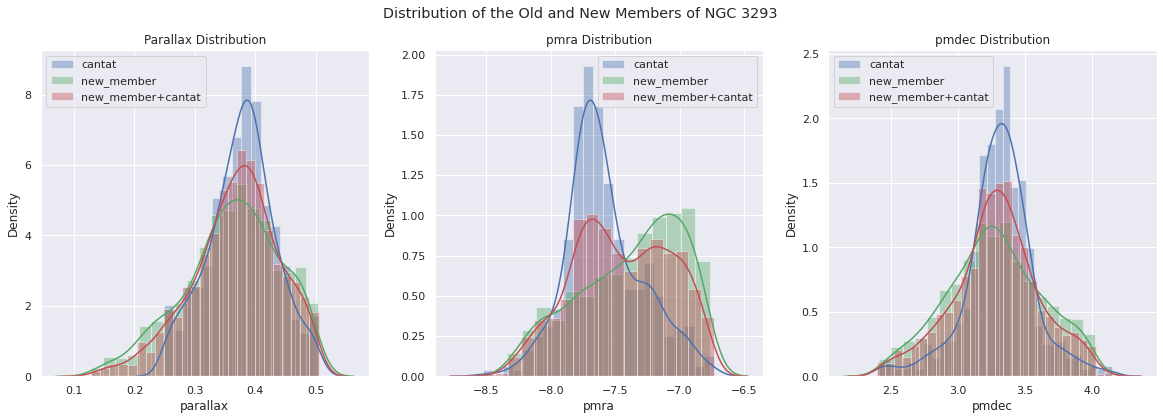

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of NGC 3293')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


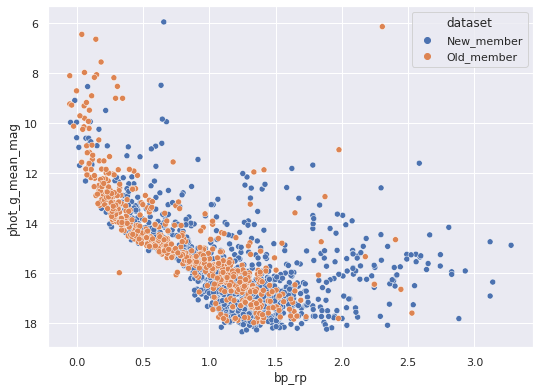

In [73]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

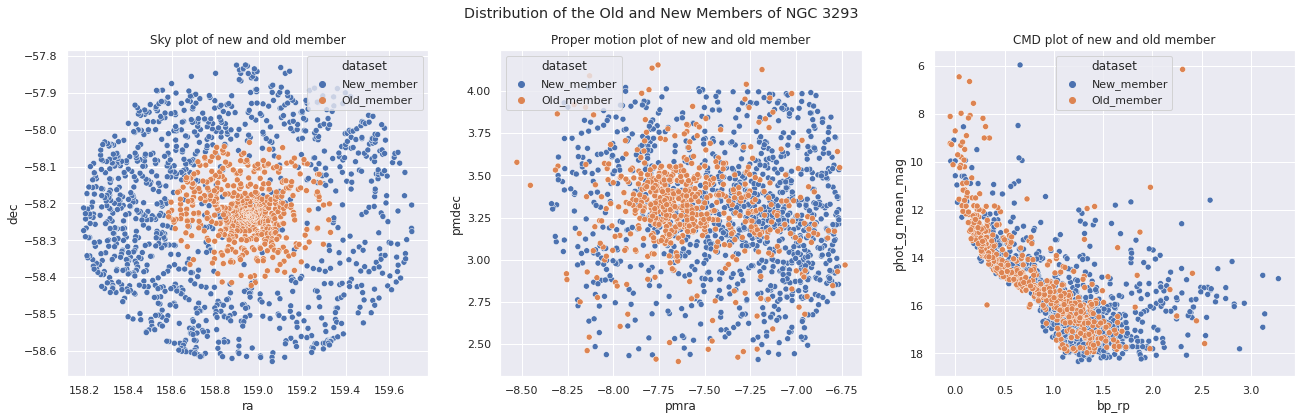

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of NGC 3293')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

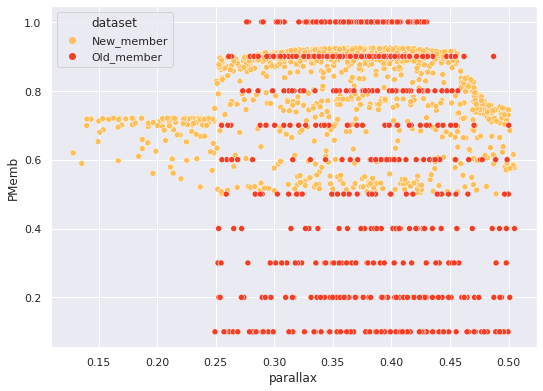

In [75]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [76]:
# pd_prof.ProfileReport(potentialMember)

In [77]:
#files.download('NGC_3293_cantat.csv')

#files.download('NGC_3293_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


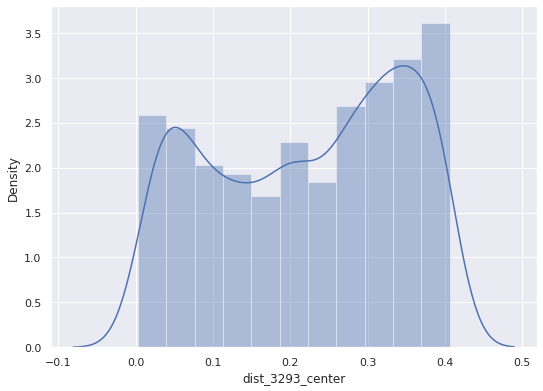

In [78]:
sns.distplot(concatenated['dist_3293_center'])

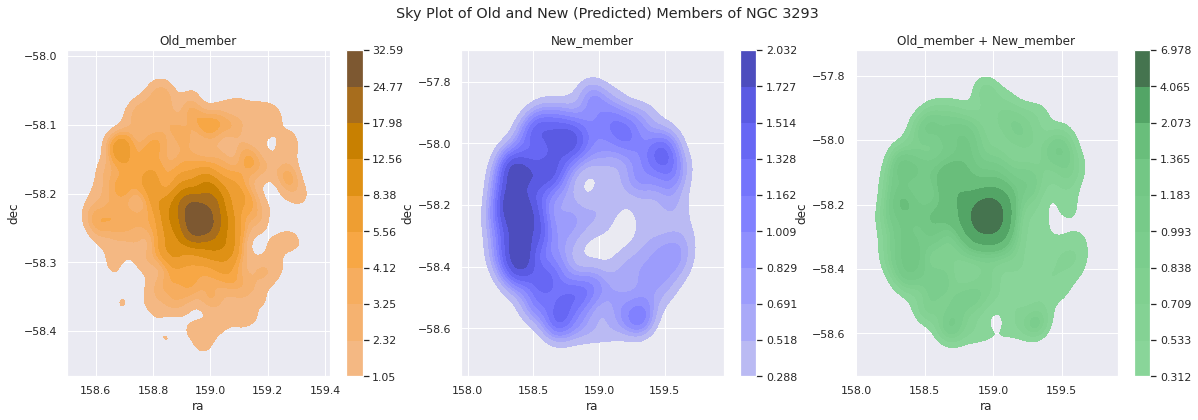

In [79]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of NGC 3293')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

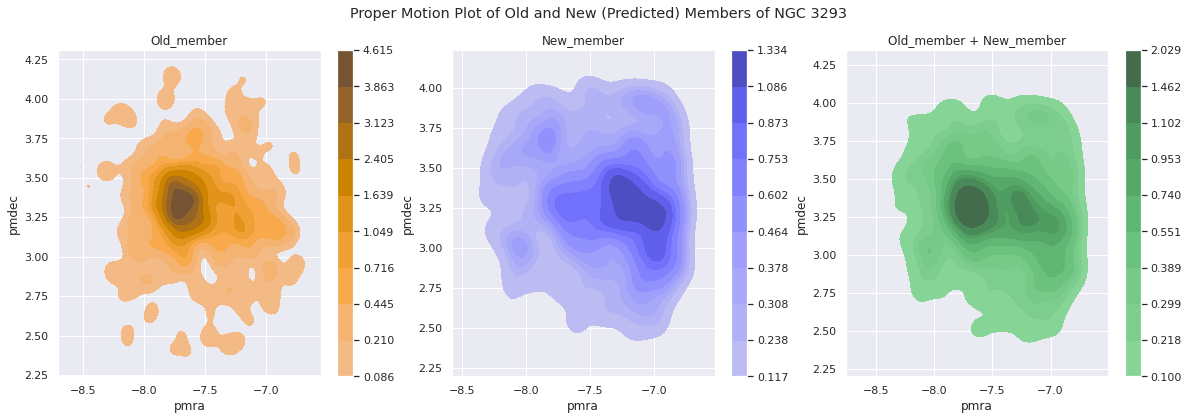

In [80]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of NGC 3293')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [81]:
#files.download('NGC_3293_cantat.csv')

potentialMember.to_csv('NGC_3293_additional_member_prob.csv')
concatenated.to_csv('NGC_3293_all_member_prob.csv')

files.download('NGC_3293_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('NGC_3293_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>